#  Film Industry Market Analysis for Business Diversification

## Introduction

In this section, I will use exploratory data analysis (EDA), the goal is to provide key  insights for a business stakeholder considering entry into the film industry. With the rise of major companies producing original video content, our company plans to launch a new movie studio but lacks industry knowledge. 
By identifying which types of films perform best, I will provide data-driven recommendations to guide leadership to make informed decisions on the genres, formats and strategies most likely to drive success in this new venture.

For a Tableau presentation, refer to this link [Tableau](https://public.tableau.com/views/Phase2_wb/Phase2-Project-Dashboard?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

## Business Understanding

The company's goal is to establish which  films are currently doing the best at the box office.Through data analysis I will  translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

I will do this by answering vital business questions, such as:
- How much production budget is required for certain films?
- Which investments are highly efficient?
- What are the trends in budgets vs worldwide gross over decades?
- Which genres have the highest profit ?

## Data understanding

Data has been sourced from multiple datasets. These sources are most relevant since they provide indepth information regarding films and the process that is involved in creating them. The datasets we are working with include:

- Box Office Mojo
- IMDB
- Rotten Tomatoes Movies
- Rotten Tomatoes Critic Reviews
- TheMovieDB
- The Numbers
- im.db (SQLite database)

The data provides information regarding genre, ratings, release time, revenue, and budget. Data limitations may include; missing data, 
time period bias and estimation inaccuracy.

Using the data above, I will conduct exploratory data analysis in Python. Data exploration helps us understand the structure, quality, and characteristics of the data we are working with. Popular Python libraries and modules like Pandas and SQL will be crucial in this analysis.

## Data analysis

### Data Preparation

The following data preparartion steps will prepare our data for analysis and visualization,  reducing the risk of errors and 

In [7]:
# Import necessary libraries and their standard aliases
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
#establish a connection with the dataset
conn = sqlite3.connect('im.db')

**Data Cleaning**

Here I will use pandas to:

- Check for and deal with missing values by:
  * Dropping rows/columns
  * Filling missing values with median
- Splitting rows.
- Adding rows.
- Changing column names.

In [12]:
#load the first dataset
bom_df = pd.read_csv("bom.movie_gross.csv")
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [13]:
#check for missing values
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [14]:
#fill the missing values with the median
#change foreign_gross values from string to numeric
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '')
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'])
bom_df['foreign_gross']=bom_df["foreign_gross"].fillna(bom_df["foreign_gross"].median())
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18700000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,18700000.0,2018
3384,El Pacto,Sony,2500.0,18700000.0,2018
3385,The Swan,Synergetic,2400.0,18700000.0,2018


In [15]:
#drop studio column
bom_df.drop(columns=['studio'], inplace=True)
bom_df.head()

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010
3,Inception,292600000.0,535700000.0,2010
4,Shrek Forever After,238700000.0,513900000.0,2010


In [16]:
#load the second dataset
tn_df = pd.read_csv("tn.movie_budgets.csv")
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [17]:
#check for missing values
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [18]:
#rename the movie column to title
tn_df.rename(columns={'movie':'title'}, inplace = True)
tn_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [19]:
#split the release_date column and rename it to month_date and year
tn_df['release_date'].str.split(',', n=2, expand=True).rename(columns={0:'month_date', 1:'year'})                                                          

,month_date,year
0,Dec 18,2009
1,May 20,2011
2,Jun 7,2019
3,May 1,2015
4,Dec 15,2017
...,...,...
5777,Dec 31,2018
5778,Apr 2,1999
5779,Jul 13,2005
5780,Sep 29,2015


In [20]:
#add the two new columns to tn_df
tn_df[['month_date', 'year']] = tn_df['release_date'].str.split(',', n=2,expand=True)
tn_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec 18,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May 20,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun 7,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May 1,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec 15,2017


In [21]:
#drop the release_date and month_date columns
tn_df=tn_df.drop(['release_date', 'month_date'], axis=1)
tn_df.head()

,id,title,production_budget,domestic_gross,worldwide_gross,year
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [22]:
#remove the dolar sign from the respective columns
#regex helps python understand special characters like dollar sign
cols_to_clean = ['domestic_gross', 'production_budget', 'worldwide_gross']
tn_df[cols_to_clean]=(tn_df[cols_to_clean].replace('[\$,]','', regex=True).astype(float))
tn_df.head()

,id,title,production_budget,domestic_gross,worldwide_gross,year
0,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


##  Exploratory Data Analysis

**Concatenate the respective data**

I will use two datasets namely;
1. bom.movies_gross.csv
2. tn.movies_budget_csv

In [23]:
#Merging df1 and df2
#using ignore_index argument so we can create a new index
#using sort argument in order to keep the original order

concat_data = pd.concat([bom_df,tn_df], ignore_index=True, sort=False)
concat_data

,title,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,NaN,NaN,NaN
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,NaN,NaN,NaN
3,Inception,292600000.0,535700000.0,2010,NaN,NaN,NaN
4,Shrek Forever After,238700000.0,513900000.0,2010,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9164,Red 11,0.0,NaN,2018,78.0,7000.0,0.0
9165,Following,48482.0,NaN,1999,79.0,6000.0,240495.0
9166,Return to the Land of Wonders,1338.0,NaN,2005,80.0,5000.0,1338.0
9167,A Plague So Pleasant,0.0,NaN,2015,81.0,1400.0,0.0


In [24]:
#check for missing values in the concatenated  dataframe
concat_data.isnull().sum()

title                   0
domestic_gross         28
foreign_gross        5782
year                    0
id                   3387
production_budget    3387
worldwide_gross      3387
dtype: int64

In [25]:
## fill in the mising values with the median
cols = ['foreign_gross', 'domestic_gross', 'production_budget', 'worldwide_gross']
concat_data[cols] = concat_data[cols].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
concat_data[cols] = concat_data[cols].fillna(concat_data[cols].median())
concat_data

,title,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,NaN,17000000.0,27984448.5
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,NaN,17000000.0,27984448.5
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,NaN,17000000.0,27984448.5
3,Inception,292600000.0,535700000.0,2010,NaN,17000000.0,27984448.5
4,Shrek Forever After,238700000.0,513900000.0,2010,NaN,17000000.0,27984448.5
...,...,...,...,...,...,...,...
9164,Red 11,0.0,18700000.0,2018,78.0,7000.0,0.0
9165,Following,48482.0,18700000.0,1999,79.0,6000.0,240495.0
9166,Return to the Land of Wonders,1338.0,18700000.0,2005,80.0,5000.0,1338.0
9167,A Plague So Pleasant,0.0,18700000.0,2015,81.0,1400.0,0.0


In [26]:
#check for duplicates
concat_data.duplicated(subset=None)

0       False
1       False
2       False
3       False
4       False
        ...  
9164    False
9165    False
9166    False
9167    False
9168    False
Length: 9169, dtype: bool

In [27]:
#drop duplicates in the title column
concat_data.drop_duplicates(subset='title')

,title,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,NaN,17000000.0,27984448.5
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,NaN,17000000.0,27984448.5
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,NaN,17000000.0,27984448.5
3,Inception,292600000.0,535700000.0,2010,NaN,17000000.0,27984448.5
4,Shrek Forever After,238700000.0,513900000.0,2010,NaN,17000000.0,27984448.5
...,...,...,...,...,...,...,...
9164,Red 11,0.0,18700000.0,2018,78.0,7000.0,0.0
9165,Following,48482.0,18700000.0,1999,79.0,6000.0,240495.0
9166,Return to the Land of Wonders,1338.0,18700000.0,2005,80.0,5000.0,1338.0
9167,A Plague So Pleasant,0.0,18700000.0,2015,81.0,1400.0,0.0


**Calculating ROI(Return On Investment)**

This helps to determine whether the efforts that were used in making films are worth the cost and measures profitability.
It also ensures efficient use of resources.

*Formula: ROI = Profit(worldwide_gross - production_budget) / Budget * 100*

In [29]:
# Calculate ROI
concat_data['ROI (%)'] = ((concat_data['worldwide_gross'] - concat_data['production_budget']) / concat_data['production_budget']) * 100

# Round ROI to nearest whole number
concat_data['ROI (%)'] = concat_data['ROI (%)'].round()

# add ROI column as ROI (%)
roi_ = concat_data[['title', 'ROI (%)']]

concat_data.head(10)

,title,domestic_gross,foreign_gross,year,id,production_budget,worldwide_gross,ROI (%)
0,Toy Story 3,415000000.0,652000000.0,2010,NaN,17000000.0,27984448.5,65.0
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,NaN,17000000.0,27984448.5,65.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,NaN,17000000.0,27984448.5,65.0
3,Inception,292600000.0,535700000.0,2010,NaN,17000000.0,27984448.5,65.0
4,Shrek Forever After,238700000.0,513900000.0,2010,NaN,17000000.0,27984448.5,65.0
5,The Twilight Saga: Eclipse,300500000.0,398000000.0,2010,NaN,17000000.0,27984448.5,65.0
6,Iron Man 2,312400000.0,311500000.0,2010,NaN,17000000.0,27984448.5,65.0
7,Tangled,200800000.0,391000000.0,2010,NaN,17000000.0,27984448.5,65.0
8,Despicable Me,251500000.0,291600000.0,2010,NaN,17000000.0,27984448.5,65.0
9,How to Train Your Dragon,217600000.0,277300000.0,2010,NaN,17000000.0,27984448.5,65.0


In [30]:
#displays the summary of descriptive statistics
concat_data.describe()

,domestic_gross,foreign_gross,id,production_budget,worldwide_gross,ROI (%)
count,9.169000e+03,9.169000e+03,5782.000000,9.169000e+03,9.169000e+03,9169.000000
mean,3.696713e+07,3.117944e+07,50.372363,2.619909e+07,6.802965e+07,263.647944
std,6.798446e+07,6.883683e+07,28.821076,3.394050e+07,1.420870e+08,2349.861946
min,0.000000e+00,6.000000e+02,1.000000,1.100000e+03,0.000000e+00,-100.000000
25%,3.310000e+05,1.870000e+07,25.000000,1.100000e+07,1.500000e+07,15.000000
50%,1.009710e+07,1.870000e+07,50.000000,1.700000e+07,2.798445e+07,65.000000
75%,4.467276e+07,1.870000e+07,75.000000,2.500000e+07,4.715865e+07,137.000000
max,9.367000e+08,9.605000e+08,100.000000,4.250000e+08,2.776345e+09,179900.000000


The completed table(concat_data), has all of the columns that will be require for data visualization. 

## Data Visualization

### Bar Chart

**1. This bar chart shows how much on average movies earn domestically vs. internationally compared to their budgets.**

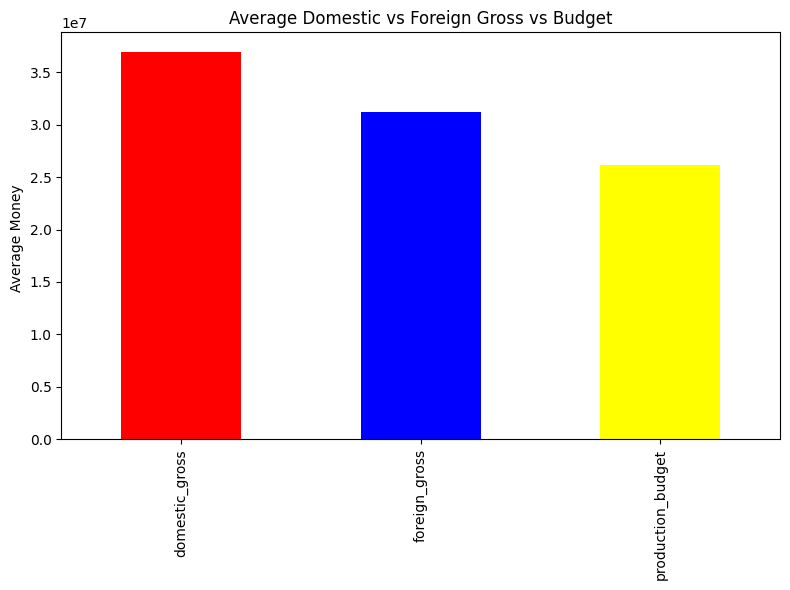

In [32]:
#Shows how much on average movies earn domestically vs. internationally compared to their budgets.
#choose the colors used in the visualization
colors = ['red', 'blue', 'yellow']

#plot the figure on axes
ax = concat_data[['domestic_gross','foreign_gross','production_budget']].mean().plot(
    kind='bar',
    color = colors,
    figsize=(8,6)
)

#add label and title
ax.set_ylabel('Average Money ')
ax.set_title('Average Domestic vs Foreign Gross vs Budget')

#show chart
plt.tight_layout()
plt.show()

From the chart above, it is clear that the average revenue received from the domestic audience is much higher than from the foreign audience. However, both surpass the production budget which is a very positive result since it shows that the films have yielded profit.


**2.This chart shows how much of revenue comes from domestic vs foreign audiences.**

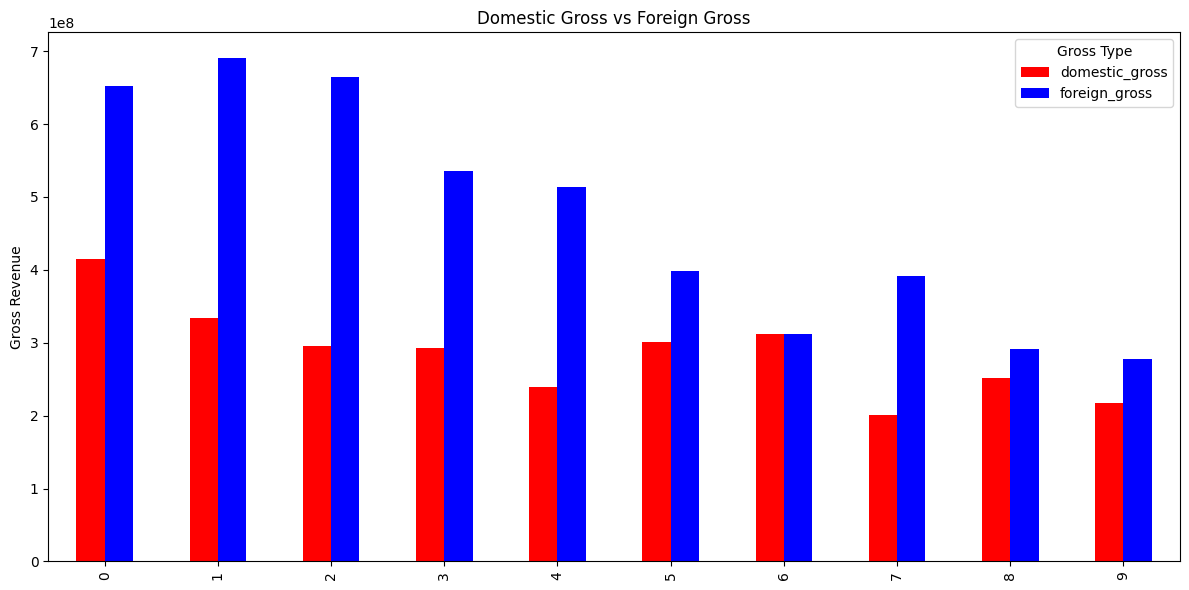

In [33]:
# Show how much of revenue comes from domestic vs foreign audiences.
#choose the colors used in the visualization
colors =['red', 'blue']

#plot the figure on axes
ax = concat_data[['domestic_gross','foreign_gross']].head(10).plot(
    kind='bar',
    stacked=False,
    figsize=(12,6), 
    color=colors
)

#add the title, label, and legend
ax.set_ylabel('Gross Revenue')
ax.set_title('Domestic Gross vs Foreign Gross')
plt.legend(title="Gross Type")

#show the plot
plt.tight_layout()
plt.show()

In the plot above, we are able to interpret the difference in revenue from domestic vs foreign audiences in detail. It shows that the data is heavily right skewed, that is why the foreign audience is sometimes shown to generate more revenue than the domestic. A few movies earn hundreds of millions in foreign countries, but it cannot be higher than the highest individual domestic revenue.

**2. This is chart shows the profit each movie makes.**

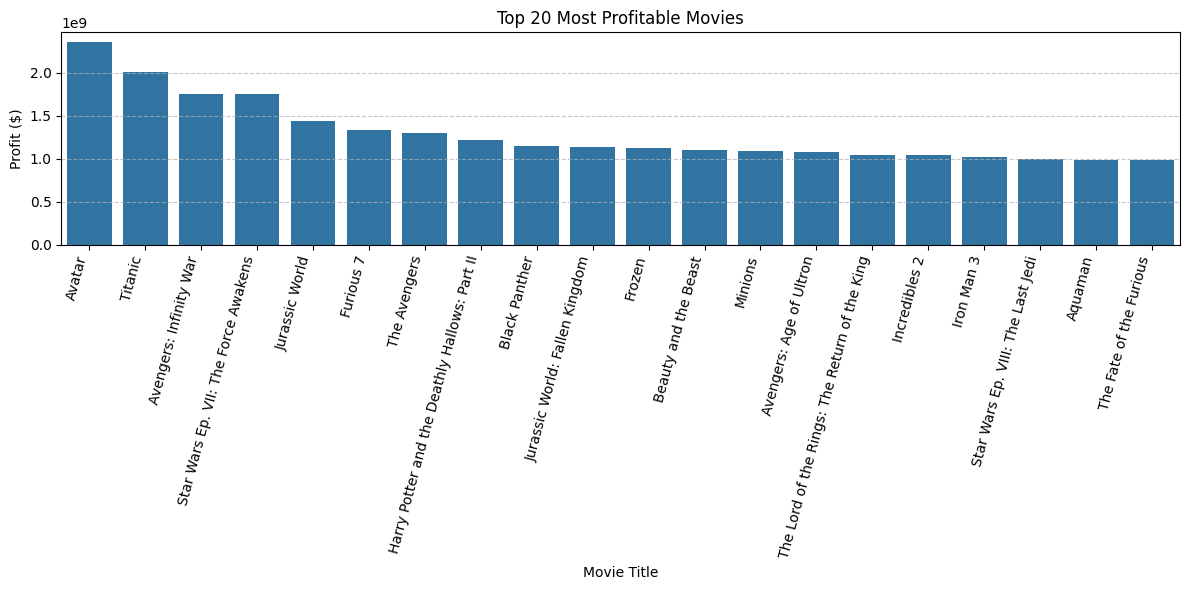

In [34]:
#Ensure gross & budget are numeric 
cols = ['worldwide_gross', 'production_budget']
concat_data[cols] = concat_data[cols].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

#Calculate profit 
concat_data['profit'] = concat_data['worldwide_gross'] - concat_data['production_budget']

#Drop missing or invalid profits 
profit_data = concat_data.dropna(subset=['profit'])

#Select Top N Movies by Profit
top_n = 20  # keeps only 20
profit_data = profit_data.nlargest(top_n, 'profit')

#Create the Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(data=profit_data, x='title', y='profit')

#Add labels and title
plt.xlabel("Movie Title")
plt.ylabel("Profit ($)")
plt.title(f"Top {top_n} Most Profitable Movies")

#Rotate labels for readability 
plt.xticks(rotation=75, ha='right')

#Add grid for readability
plt.grid(axis='y', linestyle="--", alpha=0.7)#alpha makes gridlines slightly transparent

#Display
plt.tight_layout()
plt.show()

In the plot above, the top 20 most profitable movies are displayed, Avatar being the most profitable. The movie Avatar belongs to multiple genres with science fiction, action, and fantasy being the most notable. While the next 4 movies are equally successful belonging to similar genres including Drama. The highest recorded profit is up to 2billion US dollars.

## Histogram 

**1. This histogram shows the distribution of profits.**

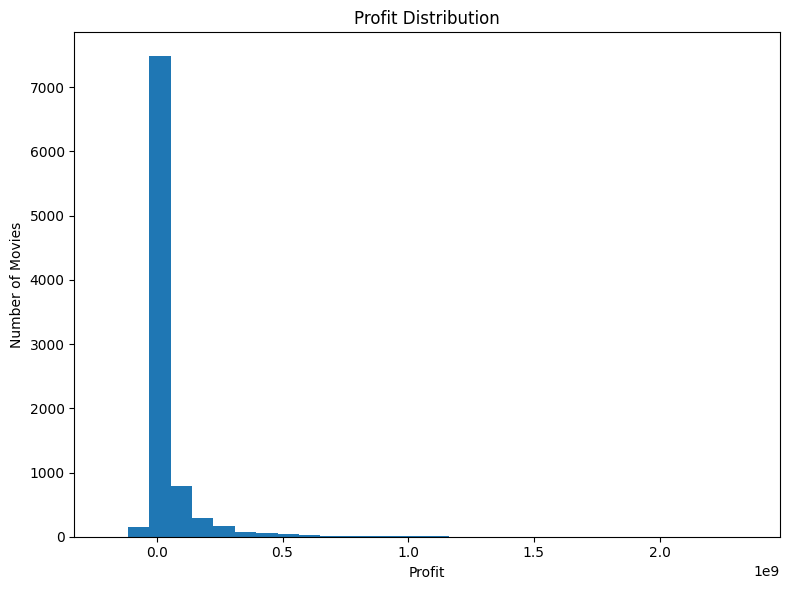

In [35]:
#histogram for the distibution of profits
concat_data['profit'] = concat_data['worldwide_gross'] - concat_data['production_budget']

#plot the figure on axes
ax = concat_data['profit'].plot(
    kind='hist',
    bins=30,
    title="Profit Distribution",
    figsize=(8,6)
)

# Add axis labels
ax.set_xlabel("Profit")
ax.set_ylabel("Number of Movies")

#show the plot
plt.tight_layout()
plt.show()

This plot shows how profitable movies are overall and it shows that most movies are clustered around zero, therefore the industry is risky to venture in.

**2. This chart shows the distribution of Return On Investment(ROI(%))**

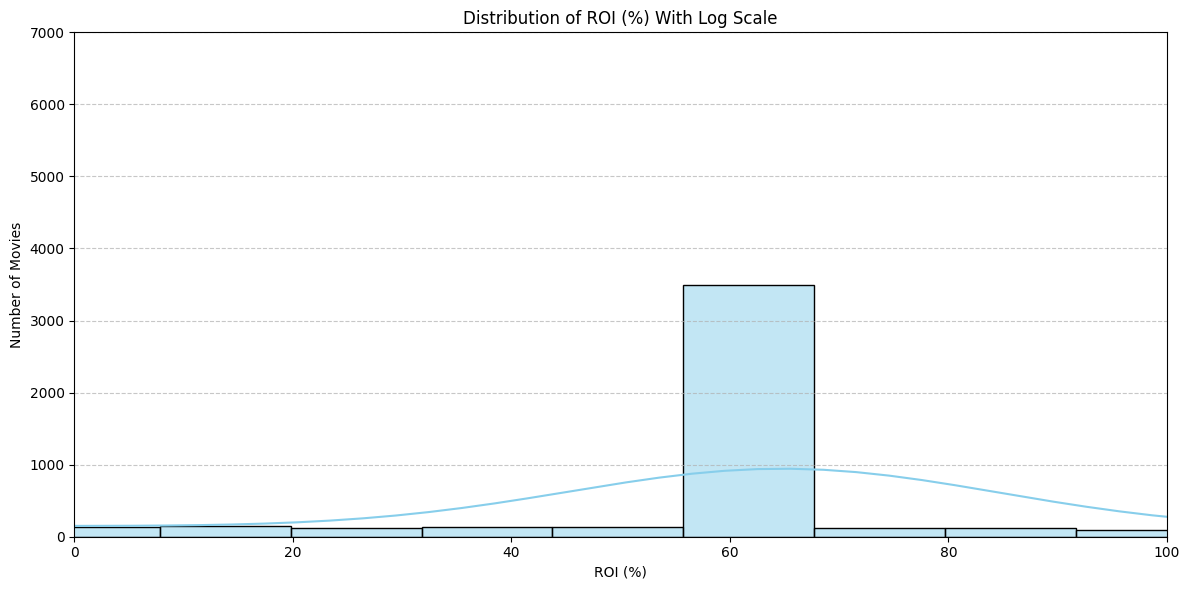

In [36]:
#show the distribution of ROI(%)
#Plot the figure
plt.figure(figsize=(12,6))

# Histogram with KDE overlay
sns.histplot(concat_data[concat_data['ROI (%)'] < 500]['ROI (%)'], bins=50, kde=True, color="skyblue", edgecolor="black")

#makes sure the x axis has a linear scale
plt.xscale('linear')

# Add labels and title
plt.xlabel("ROI (%)")
plt.ylabel("Number of Movies")
plt.title("Distribution of ROI (%) With Log Scale")

# Show grid for readability
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Adjust ticks dynamically (reduce crowding)
plt.locator_params(axis="x")  # ~8 ticks on x-axis

# Optional: set x-axis limits to remove extreme outliers
plt.xlim(0, 100)  # adjust based on your ROI range
plt.ylim(0, 7000) 

#show the plot
plt.tight_layout()
plt.show()

This reveals the overall distribution of ROI, in the movie industry. Most movies make a return on investment lower than 60%. Similar to the histogram for the distribution of profits, investing into the movie industry is a risky venture.

## Scatter Plot

**This plot shows the relationship between the budget and revenue.**

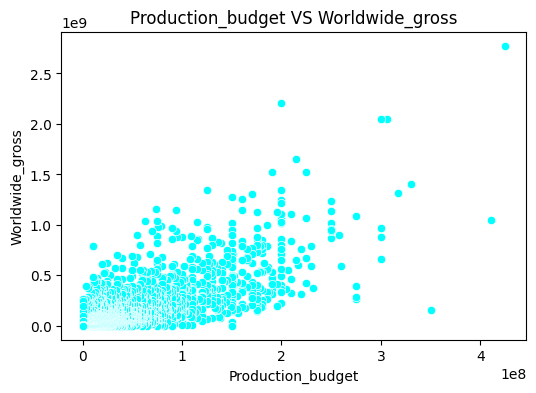

In [37]:
# Create a scatter plot to show the relationship between budget and revenue
plt.figure(figsize=(6, 4))
sns.scatterplot(data=concat_data, x="production_budget", y="worldwide_gross", color='cyan')
plt.title('Production_budget VS Worldwide_gross')
plt.xlabel('Production_budget')
plt.ylabel('Worldwide_gross')
plt.show()

From the scatter plot, it is clear that if more money was used in the production budget, more revenue was generated. Likely due to the quality of the movies.

## Line Graph

This graph shows trends in budgets vs worldwide gross over decades.

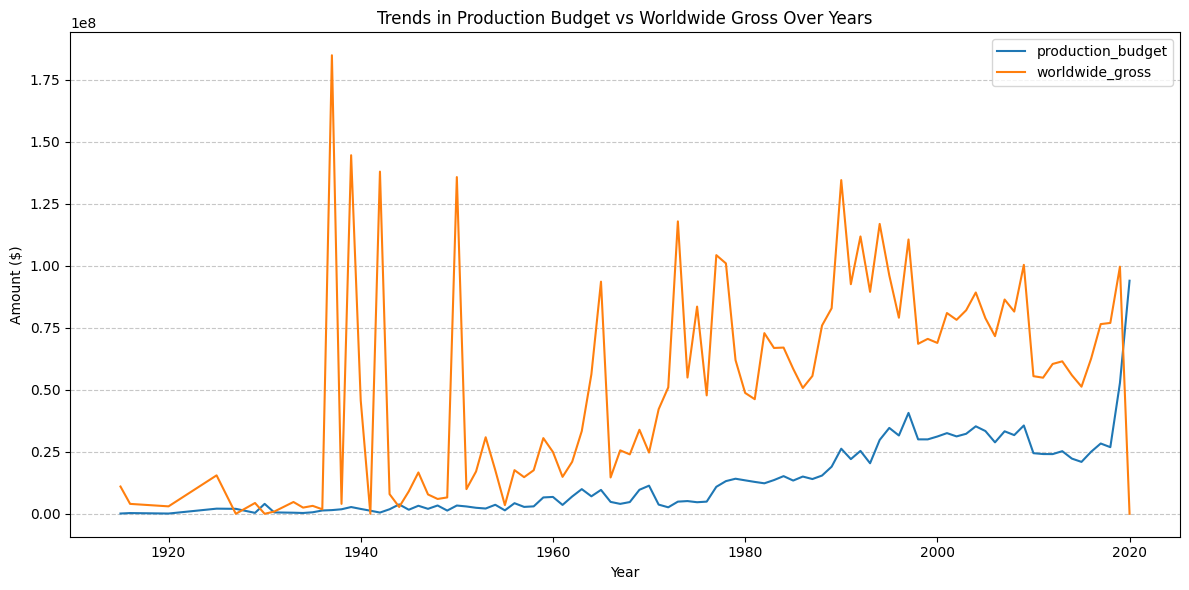

In [38]:
import matplotlib.pyplot as plt

# --- Ensure 'year' is numeric ---
concat_data['year'] = pd.to_numeric(concat_data['year'], errors='coerce')

# --- Group by year and calculate average budgets & worldwide gross ---
trend_data = (
    concat_data
    .dropna(subset=['year'])  # drop rows where year is NaN after conversion
    .groupby('year')[['production_budget', 'worldwide_gross']]
    .mean()
    .sort_index(ascending=True)   
)

# --- Plot ---
trend_data.plot(figsize=(12,6))

plt.xlabel("Year")
plt.ylabel("Amount ($)")
plt.title("Trends in Production Budget vs Worldwide Gross Over Years")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In recent years, the money used for production has recently increased, and worldwide revenue has rather plummeted. While in past years, not much money was invested into production but the revenue received was much higher. This most likely due to cheap cost of labour and movies were much simpler.
In modern times there is a rise of illegal movie sites and movies have become much more complex and labour is more expensive.

## Reccommendations

Using the business questions highlighted at the beginning of this notebook, I shall make the following recommendations:

1. *How much production budget is required for certain films?*
     * I would suggest the movie production budget range between 17 to 30 million US dollars. This is the most popular range of       values  within the music industry.

2. *Which investments are highly efficient?*
     *  It is clear that the film company should invest heavily in their domestic audience and cater to their entertainment needs while also considering their foreign audience. Most movies have high return on investments than profit, therefore it is important to invest in high ROI genres(e.g., Action).

3. *Which genres have the highest profit?*
     * In our visualization genres such as Action, Fantasy, Science Fiction, and Drama have received the highest profits so it would be best to focus on these genres.

4. *What are the trends in budgets vs worldwide gross over decades?*
     * Due to tough competition in the movie industry, a lot of high performing actors and technological devices used for filming movies have recently become more expensive. In order to receive the excpected revenue, the production budget used should be over 25 million US dollars.

## Conclusion

The movie industry is very risky. It requires high capital and consistency with the latest trends. Therefore I would urge that absolutely the best should be chosen for this task.